# ***Задание 6.***

---





# **РЕШЕНИЕ ЗАДАЧИ КЛАСИФИКАЦИИ МЕТОДОМ РЕШАЮЩИХ ДЕРЕВЬЕВ**
 **Цель работы**: научиться решать задачу классификации методами
решающих деревьев и ансамблей на их основе.

Выполним анализ набора данных cancer.csv. Набор разработан для прогнозирования на основе различных признаков возникновения рецидива рака груди после прохождения некоторых видов лечения.

Атрибуты:
*  age – возраст пациента
*  menopause – менопаузальный статус пациенток
*  tumor-size – информация о размере опухоли
*  inv-nodes – информация о количестве подмышечных лимфатических узлов,
пораженных или пораженных раком молочной железы
* node-caps – информация о наличии или отсутствии инкапсуляции или вовлеченности опухоли в лимфатические узлы
*  deg-malig – степень злокачественности или тяжесть опухоли
*  breast – расположение опухоли в груди
*  breast-quad – информация о конкретном квадранте или области груди, пораженной раком
* irradiat – получал ли пациент лучевую терапию в рамках лечения рака груди.
* Class – указывает, был ли у пациентки рецидив рака (recurrence-events) или не было рецидива (целевая переменная).


# *1. Импортируйте необходимые библиотеки*

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance


# *2. Получить представление о наборе данных*

In [48]:
df=pd.read_csv('cancer.csv')
df.shape


(683, 10)

In [49]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [50]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


# *3. Предобработка данных.*

In [52]:
# Проверяем наличие пропущенных значений
df.isnull().sum()

,0
Class,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,0
deg-malig,0
breast,0
breast-quad,0
irradiat,0


# *4. Построение базового дерева решений.*

In [53]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [54]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (546, 9)
Размер тестовой выборки: (137, 9)


In [55]:
# Построение базового дерева решений
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)
y_pred_base = base_dt.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Точность базового дерева на тесте: {accuracy_base:.4f}")

Точность базового дерева на тесте: 0.9489


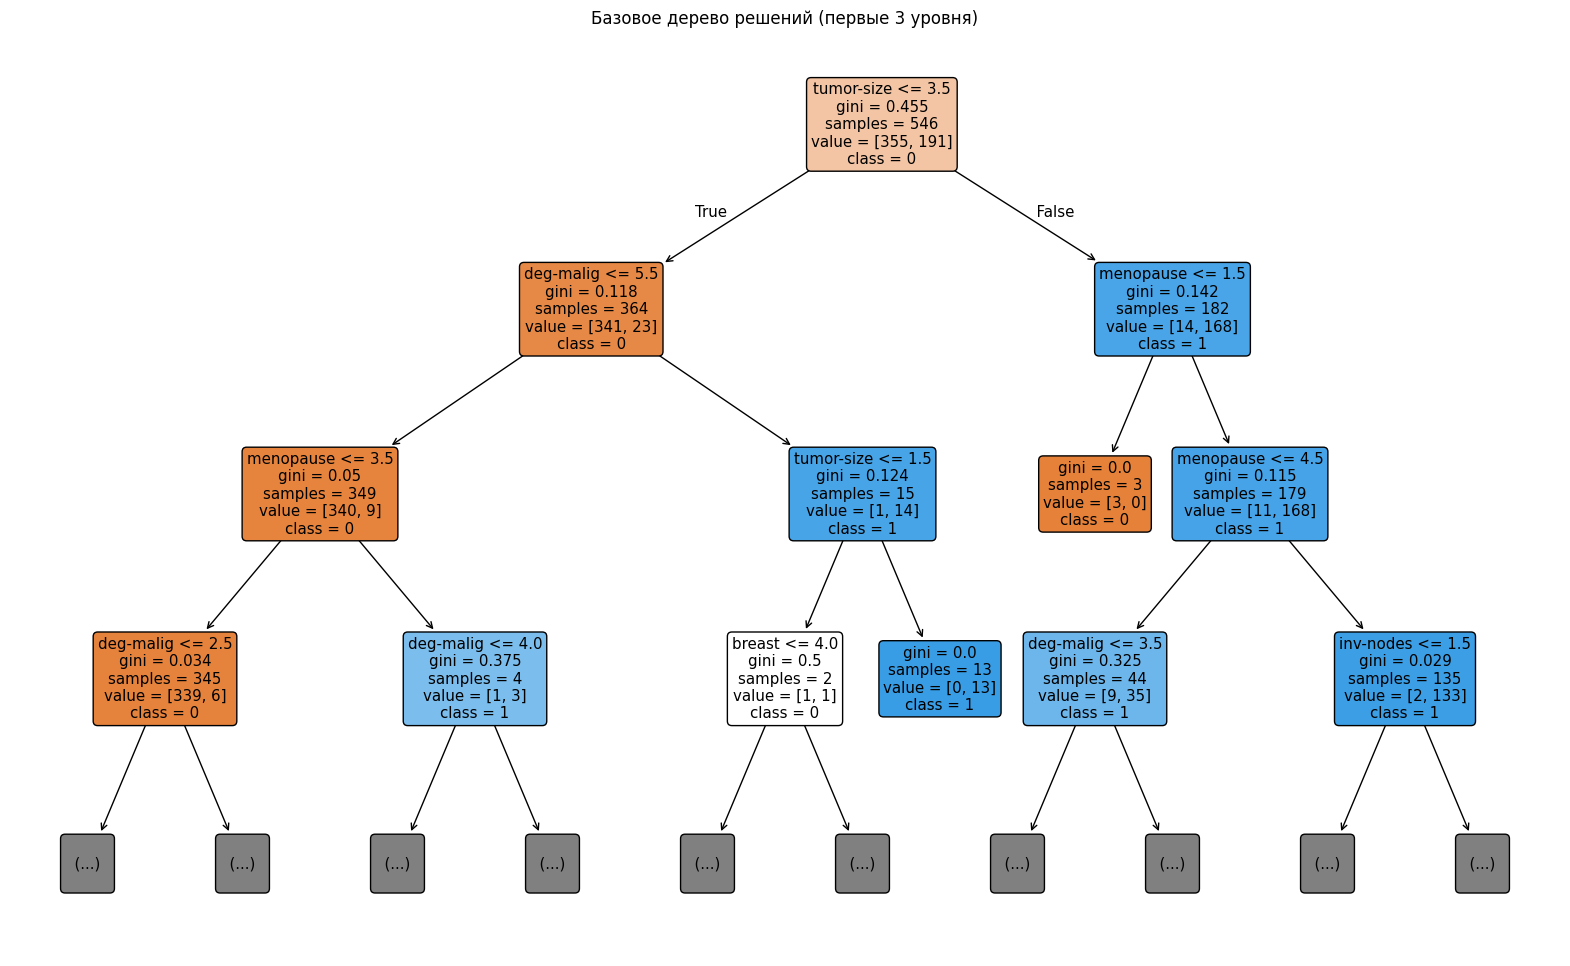

In [56]:
# Визуализация дерева (первые 3 уровня)
plt.figure(figsize=(20, 12))
plot_tree(base_dt, filled=True, feature_names=X.columns.tolist(),
          class_names=sorted(y.astype(str).unique()) , rounded=True, max_depth=3)
plt.title("Базовое дерево решений (первые 3 уровня)")
plt.show()

In [57]:
# Настройка гиперпараметров дерева
tuned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
tuned_dt.fit(X_train, y_train)
y_pred_tuned = tuned_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Точность настроенного дерева (max_depth=3) на тесте: {accuracy_tuned:.4f}")


Точность настроенного дерева (max_depth=3) на тесте: 0.9562


In [58]:
# Кросс-валидация
cv_scores_base = cross_val_score(base_dt, X, y, cv=5)
cv_scores_tuned = cross_val_score(tuned_dt, X, y, cv=5)
print(f"Кросс-валидация, базовое дерево: {np.mean(cv_scores_base):.4f} (+/- {np.std(cv_scores_base) * 2:.4f})")
print(f"Кросс-валидация, настроенное дерево: {np.mean(cv_scores_tuned):.4f} (+/- {np.std(cv_scores_tuned) * 2:.4f})")

Кросс-валидация, базовое дерево: 0.9312 (+/- 0.0533)
Кросс-валидация, настроенное дерево: 0.9356 (+/- 0.0621)


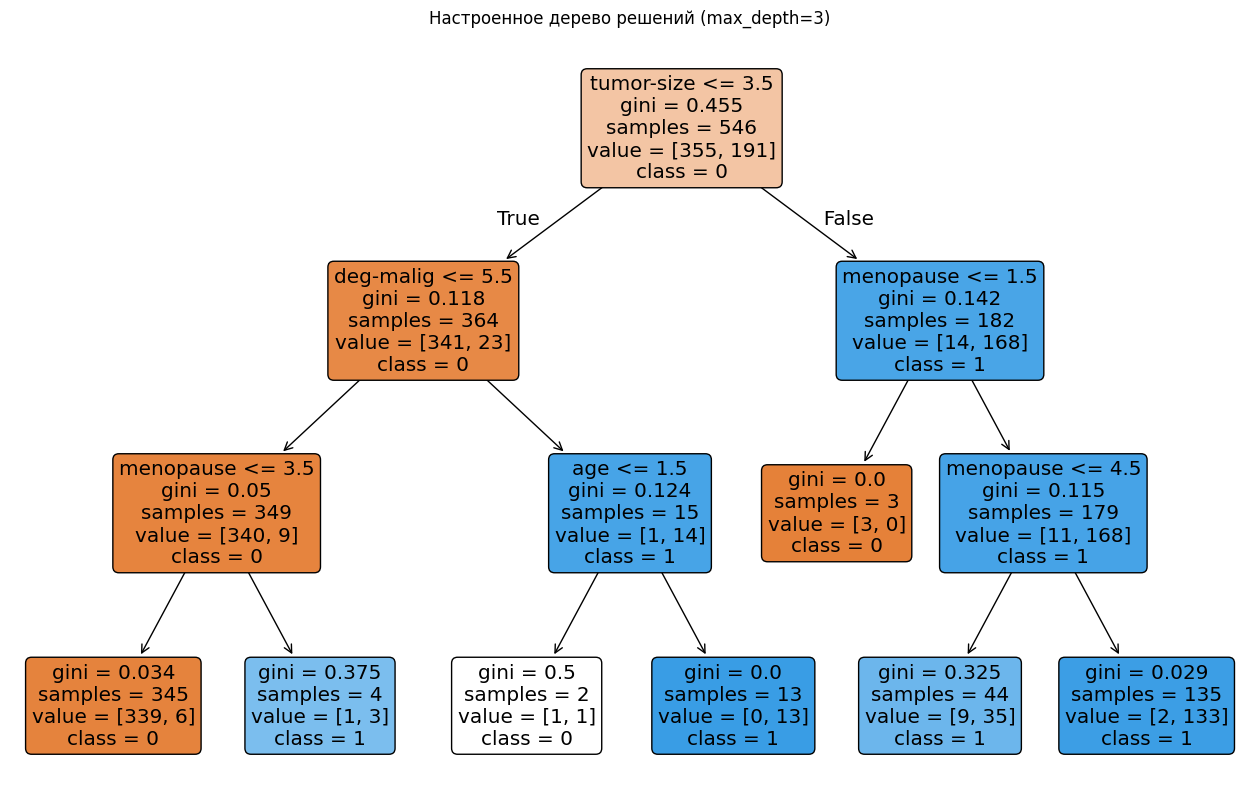

In [59]:
# Визуализация настроенного дерева
plt.figure(figsize=(16, 10))
plot_tree(tuned_dt, filled=True, feature_names=X.columns.tolist(),
          class_names=sorted(y.astype(str).unique()), rounded=True)
plt.title("Настроенное дерево решений (max_depth=3)")
plt.show()

# *5. Случайный лес.*

In [60]:
# Создание и обучение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Модель Random Forest обучена!")

Модель Random Forest обучена!


In [61]:
# Прогнозирование и оценка
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

Точность модели на тестовой выборке: 0.9562


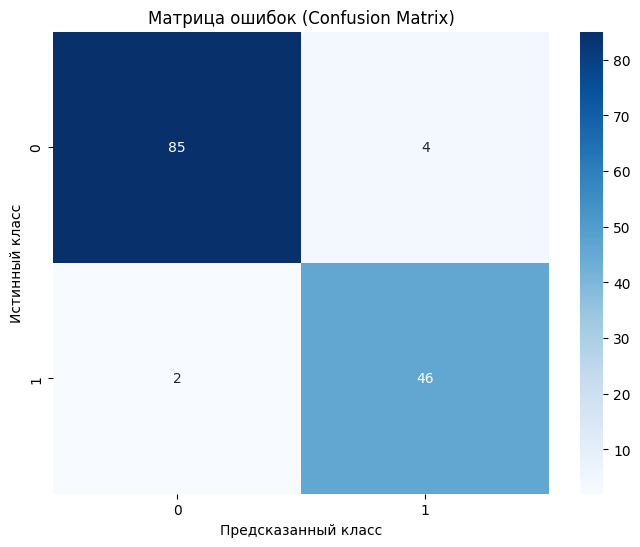

In [62]:
class_names = sorted(df['Class'].astype(str).unique())
# Матрица ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

In [63]:
# Анализ важности признаков
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
features_df = features_df.sort_values('importance', ascending=False)

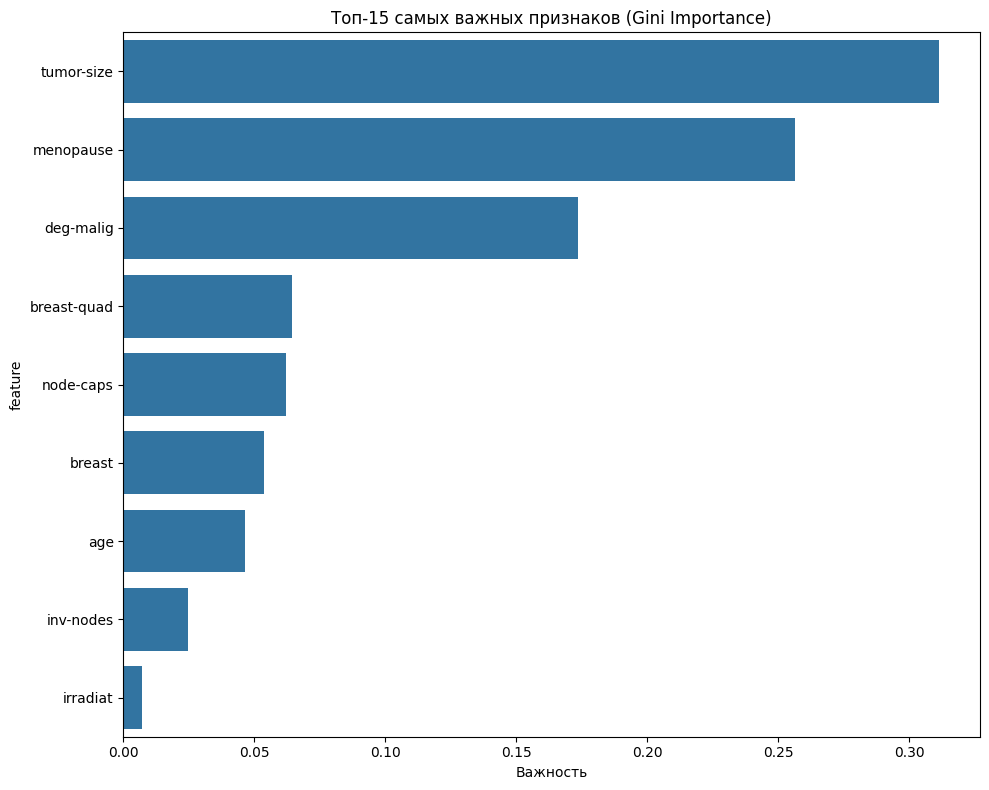

Топ-10 самых важных признаков:
       feature  importance
2   tumor-size    0.311476
1    menopause    0.256527
5    deg-malig    0.173585
7  breast-quad    0.064542
4    node-caps    0.062097
6       breast    0.053646
0          age    0.046244
3    inv-nodes    0.024621
8     irradiat    0.007263


In [64]:
# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_df.head(15))
plt.title('Топ-15 самых важных признаков (Gini Importance)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

print("Топ-10 самых важных признаков:")
print(features_df.head(10))

In [65]:
# Подбор гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации: {:.4f}".format(grid_search.best_score_))

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Лучшая точность при кросс-валидации: 0.9744


In [67]:
# Оценка лучшей модели
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}")

Точность улучшенной модели на тестовой выборке: 0.9635
